In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import zscore
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('Data_Study1A.csv')
df

,ResponseId,EX_1,EX_2,AG_1,AG_2,CO_1,CO_2,CO_3,OP_1,OP_2,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30,big5_90,gender,age,education,race,employment,income
0,R_eX6uGr8TVL6WWSl,7,7,9,9,10,10,1,4,4,4,5,4,5,5,3,2,4,2,3,5,5,6,6,4,5,6,5,6,6,4,7,5,6,5,5,2,4,2,5,6,1,52,6,4,1,7
1,R_3qrmkEBkqs1MIkE,4,10,9,11,5,7,1,9,9,6,5,6,7,2,3,2,6,5,6,3,6,6,3,3,2,3,2,3,6,5,6,5,3,5,5,5,3,5,6,6,2,28,6,1,5,3
2,R_1jfAfsrW375AjBU,2,2,2,2,1,1,1,2,2,5,7,1,1,3,7,1,1,1,3,6,7,7,7,6,5,1,7,7,3,1,7,7,7,5,1,1,1,1,3,6,1,62,5,1,1,7
3,R_1Kp8WbNfbgKHbtJ,10,10,9,9,9,9,1,8,8,4,3,3,2,3,6,6,3,2,5,5,2,5,1,5,5,6,3,6,5,2,6,5,6,5,3,5,5,4,3,6,1,50,3,"1,3",1,6
4,R_3dKD8lee40CrWKf,10,10,9,9,4,4,1,11,11,7,7,2,5,5,2,4,3,4,5,1,3,7,5,2,2,3,6,3,5,5,7,5,2,6,5,3,2,3,5,6,2,41,2,1,4,1
5,R_2qguVQdqVT6SWyk,4,3,4,7,4,4,1,4,2,2,5,5,6,6,2,2,4,5,3,5,5,6,2,4,5,3,3,1,3,6,6,3,2,6,3,3,6,6,3,6,2,26,5,4,1,5
6,R_2cAbXjEjaujfzh1,1,1,8,8,7,9,1,1,3,6,5,6,6,4,3,3,6,5,4,3,3,6,5,5,3,2,3,2,5,5,6,5,3,3,5,3,5,5,5,6,1,32,3,1,1,5
7,R_Owzdg4plZfpd79L,9,9,4,4,3,3,1,1,1,5,5,5,5,5,5,1,5,5,2,5,6,6,6,5,5,3,3,5,1,3,7,5,6,6,2,2,2,2,1,6,2,40,5,1,1,6
8,R_2RQBwIMpCytX8Tu,9,9,7,6,5,2,1,5,3,2,7,2,6,2,5,1,5,5,5,5,6,6,4,4,6,1,6,2,6,4,6,5,4,4,2,2,3,3,5,6,2,26,5,1,3,5
9,R_cYfxdGFp9KPBKYV,9,4,10,3,2,2,1,9,9,6,6,6,6,6,3,3,6,7,3,3,6,4,3,6,6,2,6,2,5,6,7,4,6,6,5,6,3,5,2,6,2,23,5,1,2,1


In [4]:
df.dtypes

ResponseId    object
EX_1           int64
EX_2           int64
AG_1           int64
AG_2           int64
CO_1           int64
CO_2           int64
CO_3           int64
OP_1           int64
OP_2           int64
big5_1         int64
big5_2         int64
big5_3         int64
big5_4         int64
big5_5         int64
big5_6         int64
big5_7         int64
big5_8         int64
big5_9         int64
big5_10        int64
big5_11        int64
big5_12        int64
big5_13        int64
big5_14        int64
big5_15        int64
big5_16        int64
big5_17        int64
big5_18        int64
big5_19        int64
big5_20        int64
big5_21        int64
big5_22        int64
big5_23        int64
big5_24        int64
big5_25        int64
big5_26        int64
big5_27        int64
big5_28        int64
big5_29        int64
big5_30        int64
big5_90        int64
gender         int64
age            int64
education      int64
race          object
employment     int64
income         int64
dtype: object

# Transform df

In [5]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
df = df[selected_cols]
df = df.iloc[:,:-1] # remove attention check
df.head()

,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30
0,4,5,4,5,5,3,2,4,2,3,5,5,6,6,4,5,6,5,6,6,4,7,5,6,5,5,2,4,2,5
1,6,5,6,7,2,3,2,6,5,6,3,6,6,3,3,2,3,2,3,6,5,6,5,3,5,5,5,3,5,6
2,5,7,1,1,3,7,1,1,1,3,6,7,7,7,6,5,1,7,7,3,1,7,7,7,5,1,1,1,1,3
3,4,3,3,2,3,6,6,3,2,5,5,2,5,1,5,5,6,3,6,5,2,6,5,6,5,3,5,5,4,3
4,7,7,2,5,5,2,4,3,4,5,1,3,7,5,2,2,3,6,3,5,5,7,5,2,6,5,3,2,3,5


In [6]:
reversed = [1, 21, 26, 7, 17, 27, 3, 8, 28, 14, 19, 24, 10, 20, 30]

big5 = dict({
             'Extraversion' : [1, 6, 11, 16, 21, 26],
             'Agreeableness' : [2, 7, 12, 17, 22, 27],
             'Conscientiousness' : [3, 8, 13, 18, 23, 28],
             'Neuroticism' : [4, 9, 14, 19, 24, 29],
             'Open_Mindedness' : [5, 10, 15, 20, 25, 30]})

big5

{'Extraversion': [1, 6, 11, 16, 21, 26],
 'Agreeableness': [2, 7, 12, 17, 22, 27],
 'Conscientiousness': [3, 8, 13, 18, 23, 28],
 'Neuroticism': [4, 9, 14, 19, 24, 29],
 'Open_Mindedness': [5, 10, 15, 20, 25, 30]}

In [7]:
list(big5.keys())[0]

'Extraversion'

In [8]:
for value in big5.values():
    print(value)

[1, 6, 11, 16, 21, 26]
[2, 7, 12, 17, 22, 27]
[3, 8, 13, 18, 23, 28]
[4, 9, 14, 19, 24, 29]
[5, 10, 15, 20, 25, 30]


In [9]:
df_c = df.copy()
df_c.columns = [col.split('_')[1] for col in df_c.columns]
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,4,5,4,5,5,3,2,4,2,3,5,5,6,6,4,5,6,5,6,6,4,7,5,6,5,5,2,4,2,5
1,6,5,6,7,2,3,2,6,5,6,3,6,6,3,3,2,3,2,3,6,5,6,5,3,5,5,5,3,5,6
2,5,7,1,1,3,7,1,1,1,3,6,7,7,7,6,5,1,7,7,3,1,7,7,7,5,1,1,1,1,3
3,4,3,3,2,3,6,6,3,2,5,5,2,5,1,5,5,6,3,6,5,2,6,5,6,5,3,5,5,4,3
4,7,7,2,5,5,2,4,3,4,5,1,3,7,5,2,2,3,6,3,5,5,7,5,2,6,5,3,2,3,5


In [10]:
def reverse_scores(row, df, col_str):
    return df[col_str].max() + 1 - row

In [11]:
for col in reversed:
    col_str = str(col)
    if col_str in df_c.columns:
        df_c[col_str] = df_c[col_str].apply(lambda row: reverse_scores(row, df_c, col_str))

df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,4,5,4,5,5,3,6,4,2,5,5,5,6,2,4,5,2,5,2,2,4,7,5,2,5,3,6,4,2,3
1,2,5,2,7,2,3,6,2,5,2,3,6,6,5,3,2,5,2,5,2,3,6,5,5,5,3,3,5,5,2
2,3,7,7,1,3,7,7,7,1,5,6,7,7,1,6,5,7,7,1,5,7,7,7,1,5,7,7,7,1,5
3,4,3,5,2,3,6,2,5,2,3,5,2,5,7,5,5,2,3,2,3,6,6,5,2,5,5,3,3,4,5
4,1,7,6,5,5,2,4,5,4,3,1,3,7,3,2,2,5,6,5,3,3,7,5,6,6,3,5,6,3,3


In [12]:
for col in df_c.columns:
    question_num = int(col)
    for i, values in enumerate(list(big5.values())):
        if int(question_num) in values:
            new_col = list(big5.keys())[i]
    if new_col not in df_c.columns:
        df_c[new_col] = df_c[col]
    else: 
        df_c[new_col] = df_c[new_col] + df_c[col]

df_c.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
0,4,5,4,5,5,3,6,4,2,5,5,5,6,2,4,5,2,5,2,2,4,7,5,2,5,3,6,4,2,3,24,31,28,15,24
1,2,5,2,7,2,3,6,2,5,2,3,6,6,5,3,2,5,2,5,2,3,6,5,5,5,3,3,5,5,2,16,31,22,32,16
2,3,7,7,1,3,7,7,7,1,5,6,7,7,1,6,5,7,7,1,5,7,7,7,1,5,7,7,7,1,5,35,42,42,6,29
3,4,3,5,2,3,6,2,5,2,3,5,2,5,7,5,5,2,3,2,3,6,6,5,2,5,5,3,3,4,5,31,18,26,19,24
4,1,7,6,5,5,2,4,5,4,3,1,3,7,3,2,2,5,6,5,3,3,7,5,6,6,3,5,6,3,3,12,31,35,26,22


In [13]:
final_columns = list(big5.keys())
df_final = df_c[final_columns]
df_final.tail(6)

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
121,25,24,20,27,37
122,15,22,33,27,24
123,23,29,19,16,33
124,19,34,23,24,28
125,20,36,32,20,39
126,21,19,12,31,35


array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Conscientiousness'}>,
        <Axes: title={'center': 'Neuroticism'}>],
       [<Axes: title={'center': 'Open_Mindedness'}>, <Axes: >]],
      dtype=object)

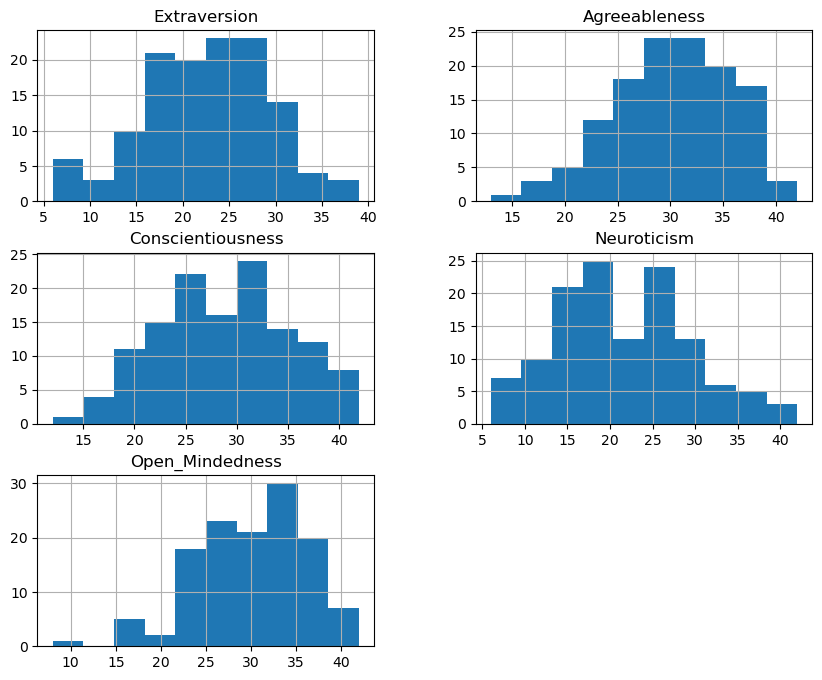

In [14]:
df_final.hist(figsize=(10,8))

In [15]:
df_final.corr()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
Extraversion,1.000000,0.318951,0.368072,-0.495670,0.353906
Agreeableness,0.318951,1.000000,0.445179,-0.309103,0.021307
Conscientiousness,0.368072,0.445179,1.000000,-0.504612,0.090215
Neuroticism,-0.495670,-0.309103,-0.504612,1.000000,-0.214562
Open_Mindedness,0.353906,0.021307,0.090215,-0.214562,1.000000


# Fit PCA

variance_ratio of each PC: [0.496, 0.188, 0.13, 0.103, 0.084]


<Figure size 640x480 with 0 Axes>

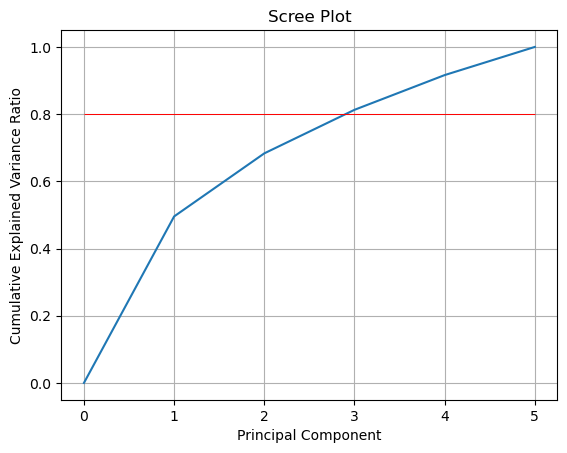

    Extraversion Agreeableness Conscientiousness Neuroticism Open_Mindedness
PC1     0.490190      0.298473          0.450151   -0.646704        0.223085
PC2    -0.330562      0.358666          0.398654   -0.074214       -0.773081
PC3     0.286036      0.595217          0.201654    0.697720        0.190848
PC4    -0.673368     -0.035234          0.510386    0.012655        0.533555
PC5     0.339414     -0.653260          0.580759    0.298820       -0.177412


In [16]:
# conduct PCA
pca = PCA(n_components = df_final.shape[1])
pca.fit(df_final)
pca_pred = pca.transform(df_final)

# calculate the variance ratio of each PC
variance_ratio = [round(variance_ratio, 3) for variance_ratio in pca.explained_variance_ratio_]
print('variance_ratio of each PC:', variance_ratio)

# scree plot
plt.figure()
plt.figure()
plt.plot([0] + list(range(1, len(variance_ratio) + 1)), [0] + list(np.cumsum(pca.explained_variance_ratio_)))
plt.hlines(y = 0.80, xmin = 0, xmax = len(variance_ratio) , color = 'r', linewidth = 0.7)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# contribution by PC
contribution = pd.DataFrame(pca.components_)
PCindex = ['PC' + str(i + 1) for i in range(df_final.shape[1])]
contribution.index = PCindex
contribution.columns = [df_final.columns[0:]]
print(contribution)

# Assign participants to PCs

In [17]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final)

# Define PCA loadings
loadings = contribution[:-2].T

# Compute the PC scores
pc_scores = pd.DataFrame(data_scaled.dot(loadings), columns=['PC1', 'PC2', 'PC3'])
print(pc_scores)

          PC1       PC2       PC3
0    0.419922  0.768924 -0.670009
1   -2.265603  1.629691  0.069697
2    3.680890  1.236860  0.721740
3   -0.214478 -0.543999 -1.424109
4   -0.943576  1.931606 -0.044216
5   -1.419465 -0.720108  1.340865
6   -1.933310  0.726945 -0.015313
7    1.005801 -0.822935  0.721812
8    0.335709  1.686253  1.559678
9   -1.267991 -0.381288  0.735325
10   0.352874 -0.543206 -0.667461
11   0.730122  0.345066 -0.662141
12   1.348967 -1.342786  0.020259
13   0.753136 -1.408775  1.005452
14   0.605781 -0.062450 -0.243803
15   0.324997  0.935201 -0.927141
16  -0.715351 -0.559937 -0.118887
17   1.597191 -0.255627  0.981890
18  -0.332005 -0.234889 -0.137604
19   0.291413 -1.426315  0.780421
20  -0.275087  0.552463 -0.290602
21   0.005579 -0.573355 -0.805970
22  -1.945786  0.375783  0.701388
23   0.933553 -1.251623 -0.700494
24   0.757282  0.171434  1.156321
25   2.591215 -0.023269  1.123426
26   0.911011 -0.241438 -0.005640
27  -0.888524 -0.797126 -1.108714
28  -0.708758 

# Categorize participants into three different clusters

In [18]:
def fit_kmean(k):
    # K-means clustering
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(pc_scores)

    pc_scores_with_clusters = pc_scores.copy()
    pc_scores_with_clusters['Cluster'] = clusters

    return clusters, kmeans, pc_scores_with_clusters

In [19]:
def assess_kmean (df):
    X = df.iloc[:,:-1]
    X = sm.add_constant(X)
    y = df.iloc[:,-1]

    lr = sm.OLS(y, X)
    lr_result = lr.fit()

    summary = lr_result.summary()
    rsquared_adj = lr_result.rsquared_adj

    return summary, rsquared_adj

In [20]:
k = 3                         # Number of clusters
trial = 20
best_rsquared_adj = 0
best_index = 0
df_pc_scores_list = []
kmeans_list = []
clusters_list = []
final_summary = None

for i in range(trial):
    clusters, kmeans, df_pc_scores = fit_kmean(k)
    df_pc_scores_list.append(df_pc_scores)
    kmeans_list.append(kmeans)
    clusters_list.append(clusters)
    summary, rsquared_adj = assess_kmean(df_pc_scores)

    if rsquared_adj > best_rsquared_adj:
        best_rsquared_adj = rsquared_adj
        best_index = i
        final_summary = summary
    
    print(f"trial {i} done with R2 = {rsquared_adj}.")

df_pc_scores = df_pc_scores_list[best_index]
kmeans = kmeans_list[best_index]
clusters = clusters_list[best_index]
print(final_summary)

trial 0 done with R2 = 0.5219616379650749.
trial 1 done with R2 = 0.6552846526761981.
trial 2 done with R2 = 0.5219616379650749.
trial 3 done with R2 = 0.5219616379650749.
trial 4 done with R2 = 0.6552846526761981.
trial 5 done with R2 = 0.6552846526761981.
trial 6 done with R2 = 0.5219616379650749.
trial 7 done with R2 = 0.6552846526761981.
trial 8 done with R2 = 0.6492873712123257.
trial 9 done with R2 = 0.6552846526761981.
trial 10 done with R2 = 0.5219616379650749.
trial 11 done with R2 = 0.6552846526761981.
trial 12 done with R2 = 0.6492873712123257.
trial 13 done with R2 = 0.5219616379650749.
trial 14 done with R2 = 0.5219616379650749.
trial 15 done with R2 = 0.6492873712123257.
trial 16 done with R2 = 0.6492873712123257.
trial 17 done with R2 = 0.6552846526761981.
trial 18 done with R2 = 0.5219616379650749.
trial 19 done with R2 = 0.5219616379650749.
                            OLS Regression Results                            
Dep. Variable:                Cluster   R-squared: 

In [21]:
kmeans

KMeans(n_clusters=3)

# Determine Outlier and conclude the categorization 

In [22]:
df_pc_scores.tail()

,PC1,PC2,PC3,Cluster
122,-1.341554,0.842233,-0.759207,1
123,-0.138715,-0.992542,-0.832464,0
124,-0.731600,0.308836,0.196494,1
125,0.794712,-0.398063,0.708604,2
126,-2.451669,-2.339104,-0.773220,0


In [23]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.76682819, -0.95115994, -0.31987941],
       [-1.24380008,  0.9578507 , -0.15158451],
       [ 1.5052563 ,  0.16665908,  0.37817376]])

In [24]:
# Calculate the distance of each point from its cluster centroid
distances = np.linalg.norm(df_pc_scores.drop('Cluster', axis=1).to_numpy() - centroids[clusters], axis=1)
df_pc_scores['Distance'] = distances
df_pc_scores.head()

,PC1,PC2,PC3,Cluster,Distance
0,0.419922,0.768924,-0.670009,2,1.624611
1,-2.265603,1.629691,0.069697,1,1.242745
2,3.680890,1.236860,0.721740,2,2.448826
3,-0.214478,-0.543999,-1.424109,0,1.300074
4,-0.943576,1.931606,-0.044216,1,1.024628


In [25]:
# Compute the z-scores for the 'Distance' column
df_pc_scores['Distance_z'] = zscore(df_pc_scores['Distance'])
df_pc_scores['Outlier'] = (np.abs(df_pc_scores['Distance_z']) >= 1.96)
df_pc_scores = df_pc_scores[~df_pc_scores['Outlier']]
df_pc_scores.shape

(121, 7)

In [26]:
X = df_pc_scores.iloc[:,:-4]
X = sm.add_constant(X)
y = df_pc_scores['Cluster']

lr = sm.OLS(y, X)
lr_result = lr.fit()

print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                Cluster   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     79.45
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           4.25e-28
Time:                        11:12:48   Log-Likelihood:                -85.755
No. Observations:                 121   AIC:                             179.5
Df Residuals:                     117   BIC:                             190.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0675      0.046     23.431      0.0

# Direct categorization

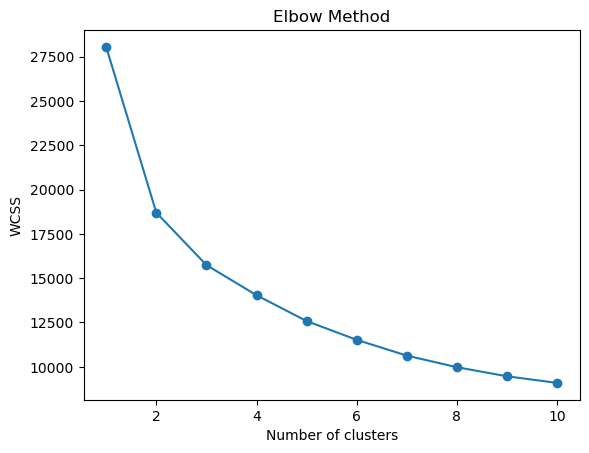

In [27]:
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette_score is: 0.2771827419026695
For n_clusters = 3, the average silhouette_score is: 0.23232438839908537
For n_clusters = 4, the average silhouette_score is: 0.1991250175793055
For n_clusters = 5, the average silhouette_score is: 0.17932512396458575
For n_clusters = 6, the average silhouette_score is: 0.18909056652884348


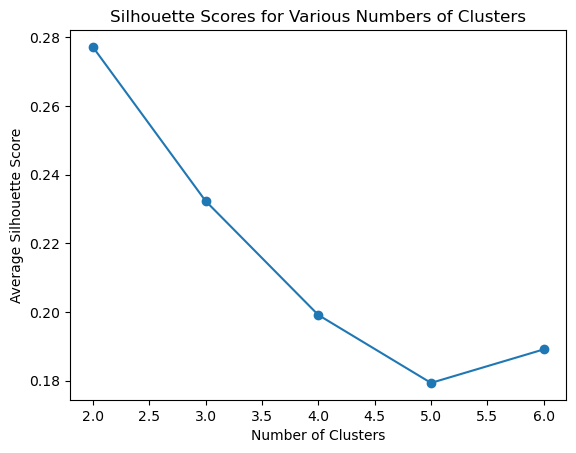

In [28]:
# Sample DataFrame 'df_final' containing your data

silhouette_scores = []
range_n_clusters = range(2, 7) 
num_trial = 20
silhouette_scores_trial = []
silhouette_best = 0
best_index = 0

for n_clusters in range_n_clusters:
    for i in range(num_trial):
        kmeans = KMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(df_final)
        silhouette_avg = silhouette_score(df_final, cluster_labels)
        silhouette_scores_trial.append(silhouette_avg)
        if silhouette_avg > silhouette_best:
            best_index = i
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_scores_trial[best_index]
    silhouette_scores.append(silhouette_avg)
    
    # reset
    silhouette_scores_trial = []
    best_index = 0
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [29]:
df_final.head()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
0,24,31,28,15,24
1,16,31,22,32,16
2,35,42,42,6,29
3,31,18,26,19,24
4,12,31,35,26,22


In [30]:
def fit_kmean(k, df):
    # K-means clustering
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(df)

    df_with_clusters = df_final.copy()
    df_with_clusters['Cluster'] = clusters

    return clusters, kmeans, df_with_clusters

In [31]:
def assess_kmean (df):
    X = df.iloc[:,:-1]
    X = sm.add_constant(X)
    y = df.iloc[:,-1]

    lr = sm.OLS(y, X)
    lr_result = lr.fit()

    summary = lr_result.summary()
    rsquared_adj = lr_result.rsquared_adj

    return summary, rsquared_adj

In [32]:
k = 2                         # Number of clusters
trial = 30
best_rsquared_adj = 0
best_index = 0
df_cluster_list = []
kmeans_list = []
clusters_list = []
final_summary = None

for i in range(trial):
    clusters, kmeans, df_cluster = fit_kmean(k, df_final)
    df_cluster_list.append(df_cluster)
    kmeans_list.append(kmeans)
    clusters_list.append(clusters)
    summary, rsquared_adj = assess_kmean(df_cluster)

    if rsquared_adj > best_rsquared_adj:
        best_rsquared_adj = rsquared_adj
        best_index = i
        final_summary = summary
    
    print(f"trial {i} done with R2 = {rsquared_adj}.")

df_cluster = df_cluster_list[best_index]
kmeans = kmeans_list[best_index]
clusters = clusters_list[best_index]
print(final_summary)

trial 0 done with R2 = 0.6760973561990882.
trial 1 done with R2 = 0.6760973561990882.
trial 2 done with R2 = 0.6760973561990882.
trial 3 done with R2 = 0.676097356199088.
trial 4 done with R2 = 0.6760973561990882.
trial 5 done with R2 = 0.6760973561990882.
trial 6 done with R2 = 0.676097356199088.
trial 7 done with R2 = 0.676097356199088.
trial 8 done with R2 = 0.6760973561990882.
trial 9 done with R2 = 0.6760973561990882.
trial 10 done with R2 = 0.6760973561990882.
trial 11 done with R2 = 0.6760973561990882.
trial 12 done with R2 = 0.6760973561990882.
trial 13 done with R2 = 0.676097356199088.
trial 14 done with R2 = 0.676097356199088.
trial 15 done with R2 = 0.6760973561990882.
trial 16 done with R2 = 0.676097356199088.
trial 17 done with R2 = 0.6760973561990882.
trial 18 done with R2 = 0.6760973561990882.
trial 19 done with R2 = 0.676097356199088.
trial 20 done with R2 = 0.6760973561990882.
trial 21 done with R2 = 0.6760973561990882.
trial 22 done with R2 = 0.676097356199088.
trial 

In [33]:
df_cluster['Cluster'].value_counts()

Cluster
0    75
1    52
Name: count, dtype: int64

In [34]:
df_cluster

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness,Cluster
0,24,31,28,15,24,1
1,16,31,22,32,16,0
2,35,42,42,6,29,1
3,31,18,26,19,24,0
4,12,31,35,26,22,0
5,25,32,21,36,31,0
6,17,30,21,30,22,0
7,29,36,26,19,36,1
8,32,39,31,28,18,1
9,19,32,23,31,32,0


In [35]:
df_cluster_group = df_cluster.groupby('Cluster').mean()
df_cluster_group

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
Cluster,,,,,
0,19.293333,27.786667,24.893333,25.920000,28.893333
1,27.519231,34.153846,33.615385,15.365385,31.865385


In [ ]:
df_cluster.scatter()